In [1]:
import sys
sys.path.append('../')
import numpy as np
import matplotlib.pyplot as plt
import importlib

from astroLuSt.synthetics import dataaugmentation as alsd, random as alsr
import astroLuSt.preprocessing.dataseries_manipulation as alpdm
import astroLuSt.synthetics.images as alsi

plt.style.use('astroLuSt.styles.LuSt_style')


# AugmentAxis

### Generate a dataset

This dataset will contian the following:
- `nsamples` samples
- `ncols` datapoints along first axes (columns)
- `nrows` datapoints along second axes (rows)
- `nchannels` number of channels (values per cell)

each sample consists of `ncols * nrows * nchannels` datapoints.

For the 3d case one just has no `nchannels` everything else is the same as for the 4d case.

(23, 50, 2, 3)
(23, 50, 1)
(23, 1)


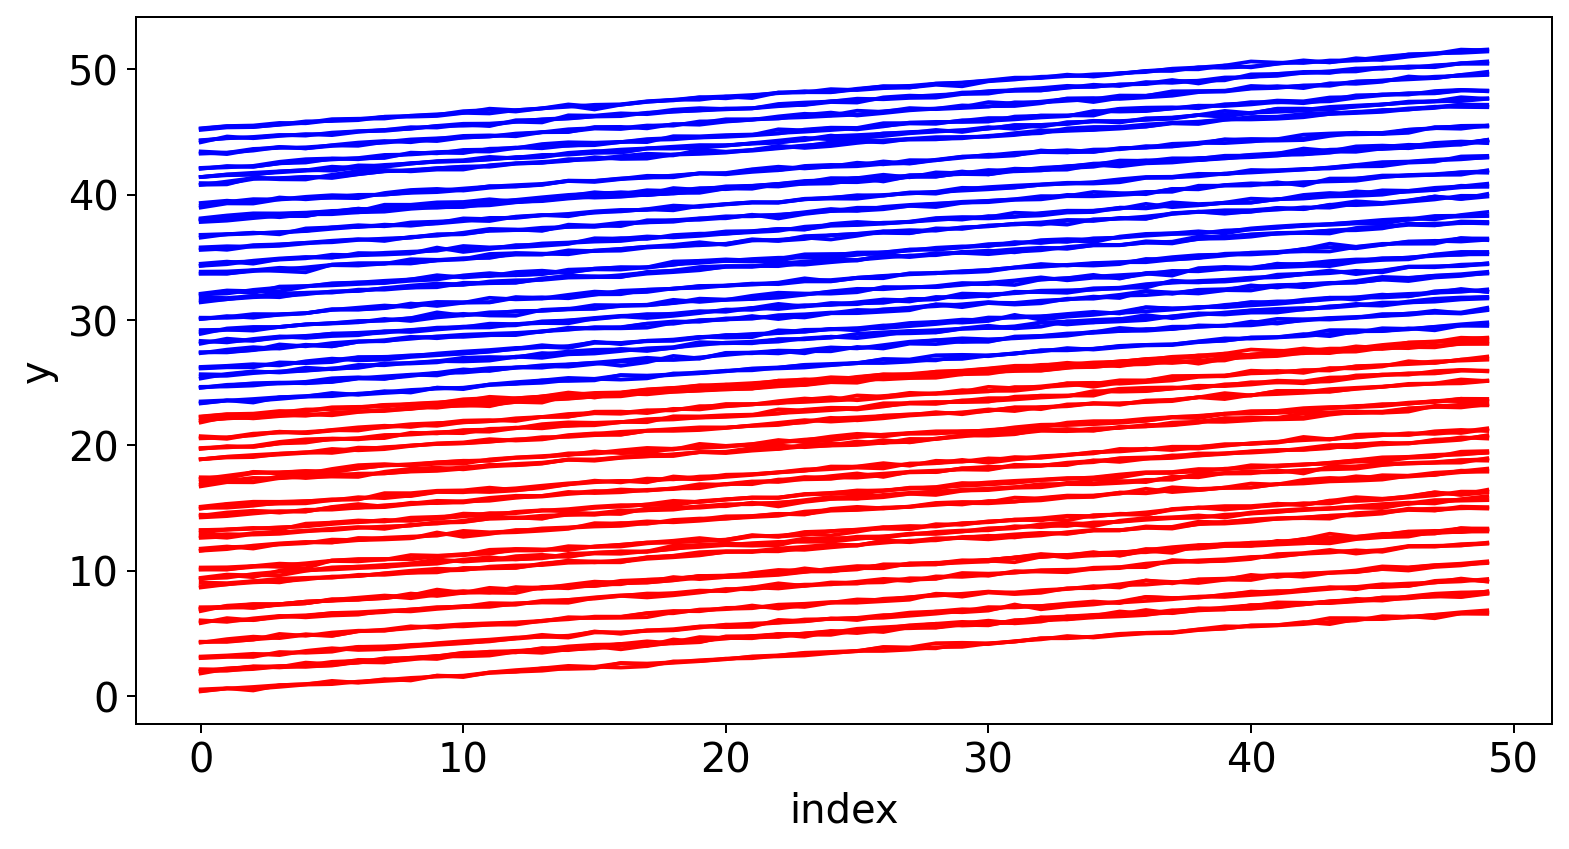

In [3]:
def generate_4d(
    shape:tuple=None,
    xmin:float=0, xmax:float=1,
    func=None
    ):
    if shape is None:
        shape = (1,20,1,1)
    if func is None:
        func = lambda x: x
    X = np.empty(shape)
    for i, xi in enumerate(X):
        x_ = np.linspace(np.zeros((X.shape[-2],X.shape[-1]))+xmin, xmax, X.shape[1])
        
        hshift = np.random.rand(x_.shape[1]).reshape(1,-1,1)
        vshift = np.zeros_like(x_)+i
        cnoise = np.random.randn(x_.shape[0], x_.shape[2]).reshape(50,1,-1)*0.1
        vshift[:,1,:] += X.shape[0]
        X[i] = func(x_+hshift) + vshift + cnoise

    return X

X = generate_4d(
    shape=(23,50,2,3),
    xmin=0, xmax=2*np.pi,
    # func=np.sin,
    func=None,
)
X3d = X[:,:,0,0]
X3d = X3d.reshape(*X3d.shape,1)
y = np.random.choice([0,1,2],size=(X.shape[0],1), replace=True,  p=[0.5,0.3,0.2])

print(X.shape)
print(X3d.shape)
print(y.shape)
#visualize
fig = plt.figure()
ax1 = fig.add_subplot(111)
for x in X:
    ax1.plot(x[:,0,:], 'r-')
    # ax1.plot(x[:,1,0], 'r-')
    ax1.plot(x[:,1,:], 'b-')
ax1.set_xlabel('index')
ax1.set_ylabel('y')
plt.show()

### Application on 4d data

AugmentAxis(
    nsamples=100,
    ntransformations=-3, methods=['add_noise_t', 'crop_t', 'flip_axis_t', 'obscure_observations_t', 'rescale_t', 'shift_features_t'], transform_order='unchanged',
    shift=(0, 20),
    flip=False,
    npoints=5, neighbors=False,
    fill_value_obscure=0, fill_value_range=(0, 1),
    cutout_start=0, cutout_size=(4, 6),
    interpkind='linear', fill_value_crop='extrapolate',
    noise_mag=(0, 0.5),
    feature_range_min=0, feature_range_max=1,
    axis=0,
    seed=None,
    verbose=1,
)
[0. 1. 2.] [0.1  0.41 0.49]


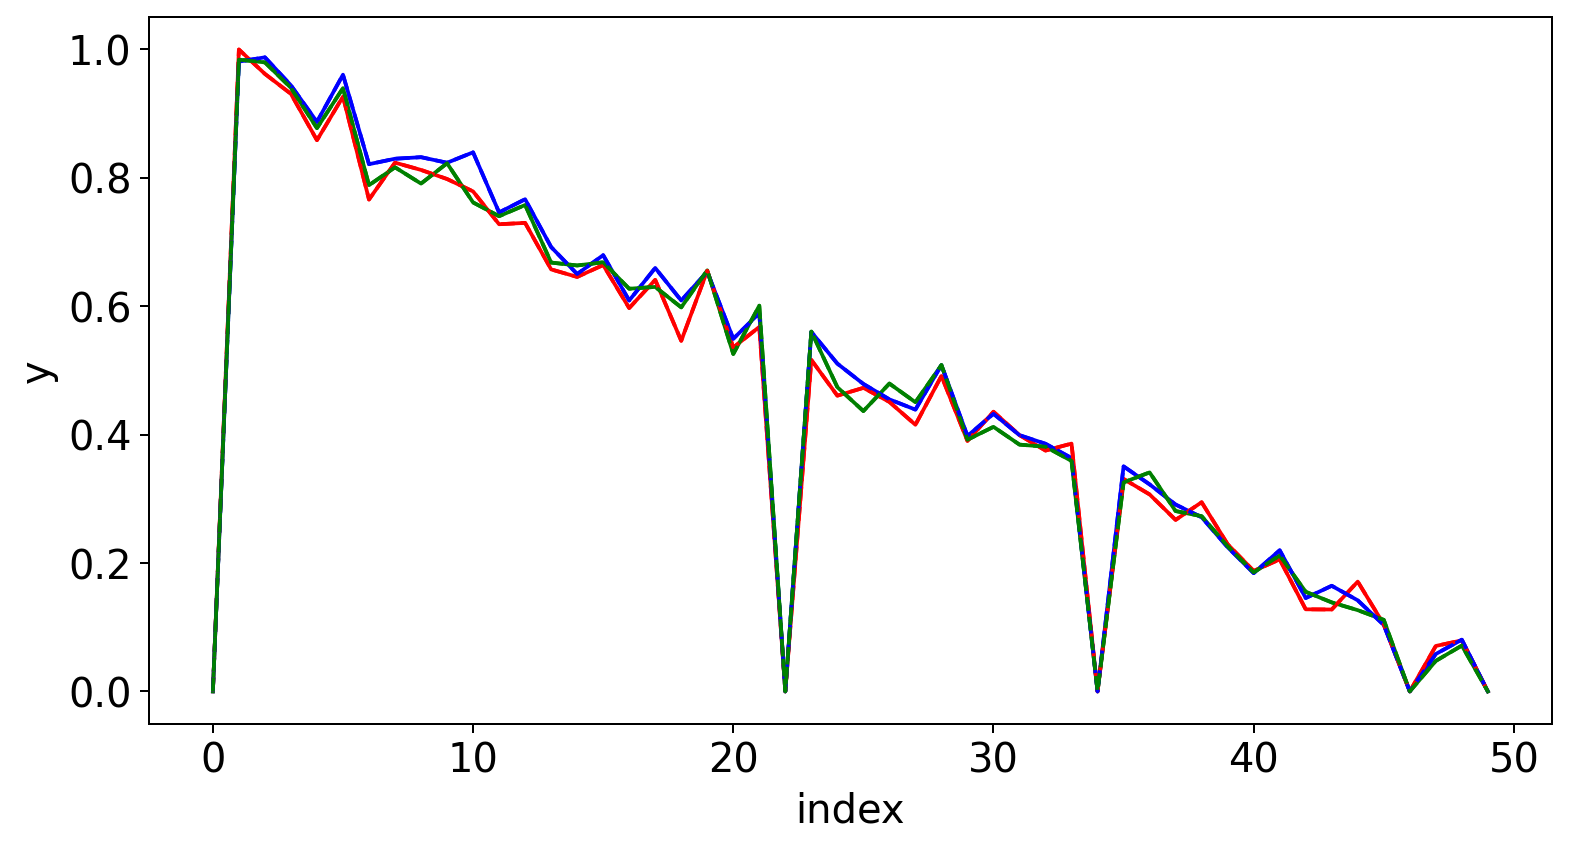

In [4]:
importlib.reload(alsd)

AA = alsd.AugmentAxis(
    nsamples=100, ntransformations=-3,
    shift=(0,20), methods=None, transform_order=None,
    npoints=5, neighbors=False,
    fill_value_obscure=0, fill_value_range=(0,1),
    cutout_start=0, cutout_size=(4,6),
    interpkind=None, fill_value_crop=None,
    noise_mag=(0,0.5),
    feature_range_min=None, feature_range_max=None,
    axis=(0),
    seed=None,
    verbose=1,
)
print(AA)

AA.fit(X)
AA.random_transform(X[0], axis=(0,1))
X_new, y_new, y1  = AA.flow(X,
    y=y,
    X_misc=[y],
    sample_weights=None, class_weights=[0.1,0.4,0.5]
)

u_, c_ = np.unique(y_new, return_counts=True)
print(u_, c_/len(y_new))

#visualize
fig = plt.figure()
ax1 = fig.add_subplot(111)
#4d
# ax1.plot(X[0,:,0,:], 'r:')
# ax1.plot(X[0,:,1,:], 'b:')
ax1.plot(X_new[0,:,0,0], 'r-')
ax1.plot(X_new[0,:,0,1], 'b-')
ax1.plot(X_new[0,:,0,2], 'g-')
ax1.plot(X_new[0,:,1,0], 'r--')
ax1.plot(X_new[0,:,1,1], 'b--')
ax1.plot(X_new[0,:,1,2], 'g--')


ax1.set_xlabel('index')
ax1.set_ylabel('y')
plt.show()

### Application on 3d data

AugmentAxis(
    nsamples=7,
    ntransformations=-1, methods=['add_noise_t', 'crop_t', 'flip_axis_t', 'obscure_observations_t', 'rescale_t', 'shift_features_t'], transform_order='unchanged',
    shift=(0, 20),
    flip=False,
    npoints=5, neighbors=True,
    fill_value_obscure='random', fill_value_range=(0, 1),
    cutout_start=0, cutout_size=(10, 15),
    interpkind='linear', fill_value_crop='extrapolate',
    noise_mag=1,
    feature_range_min=0, feature_range_max=(1, 5),
    axis=0,
    seed=None,
    verbose=1,
)


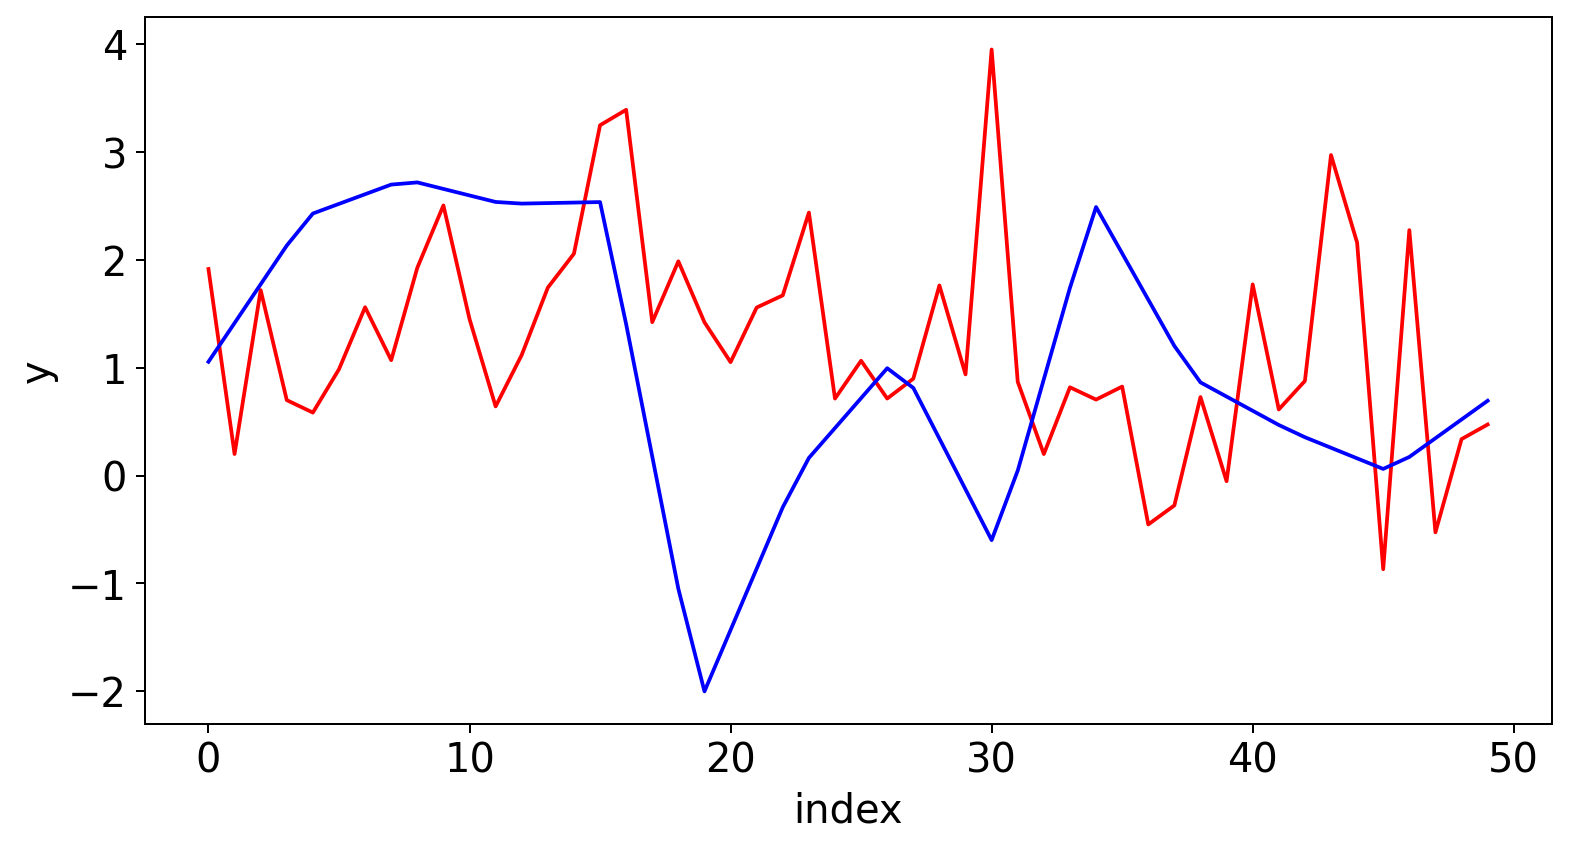

In [5]:
importlib.reload(alsd)
AA = alsd.AugmentAxis(
    nsamples=7,
    shift=(0,20), methods=None, transform_order=None,
    npoints=5, neighbors=True,
    fill_value_obscure='random', fill_value_range=(0,1),
    cutout_start=0, cutout_size=(10,15),
    interpkind=None, fill_value_crop=None,
    noise_mag=1,
    feature_range_min=0, feature_range_max=(1,5),
    axis=0,
    seed=None,
    verbose=1,
)
print(AA)


AA.fit(X)
X_new, y_new, y1  = AA.flow(X3d,
    y=y,
    X_misc=[y],
    sample_weights=None, class_weights=[0.1,0.4,0.5],
)


#visualize
fig = plt.figure()
ax1 = fig.add_subplot(111)

#3d
# ax1.plot(X3d[0,:], 'r:')
ax1.plot(X_new[0,:], 'r-')
ax1.plot(X_new[1,:], 'b-')


ax1.set_xlabel('index')
ax1.set_ylabel('y')
plt.show()

# PeriodicExpansion

Class that allows expanding any dataseries on its maximum or minimum side

Let's generate a dataset first.

In [6]:

phases = np.linspace(0,1,20)
x =np.linspace(0,5,20)
y = 1-x
z = 2*x

X = np.array([x,y,z])


PeriodicExpansion(
    x_ref_min=0.5, x_ref_max=0.6,
    minmax='minmax',
    verbose=0,
)


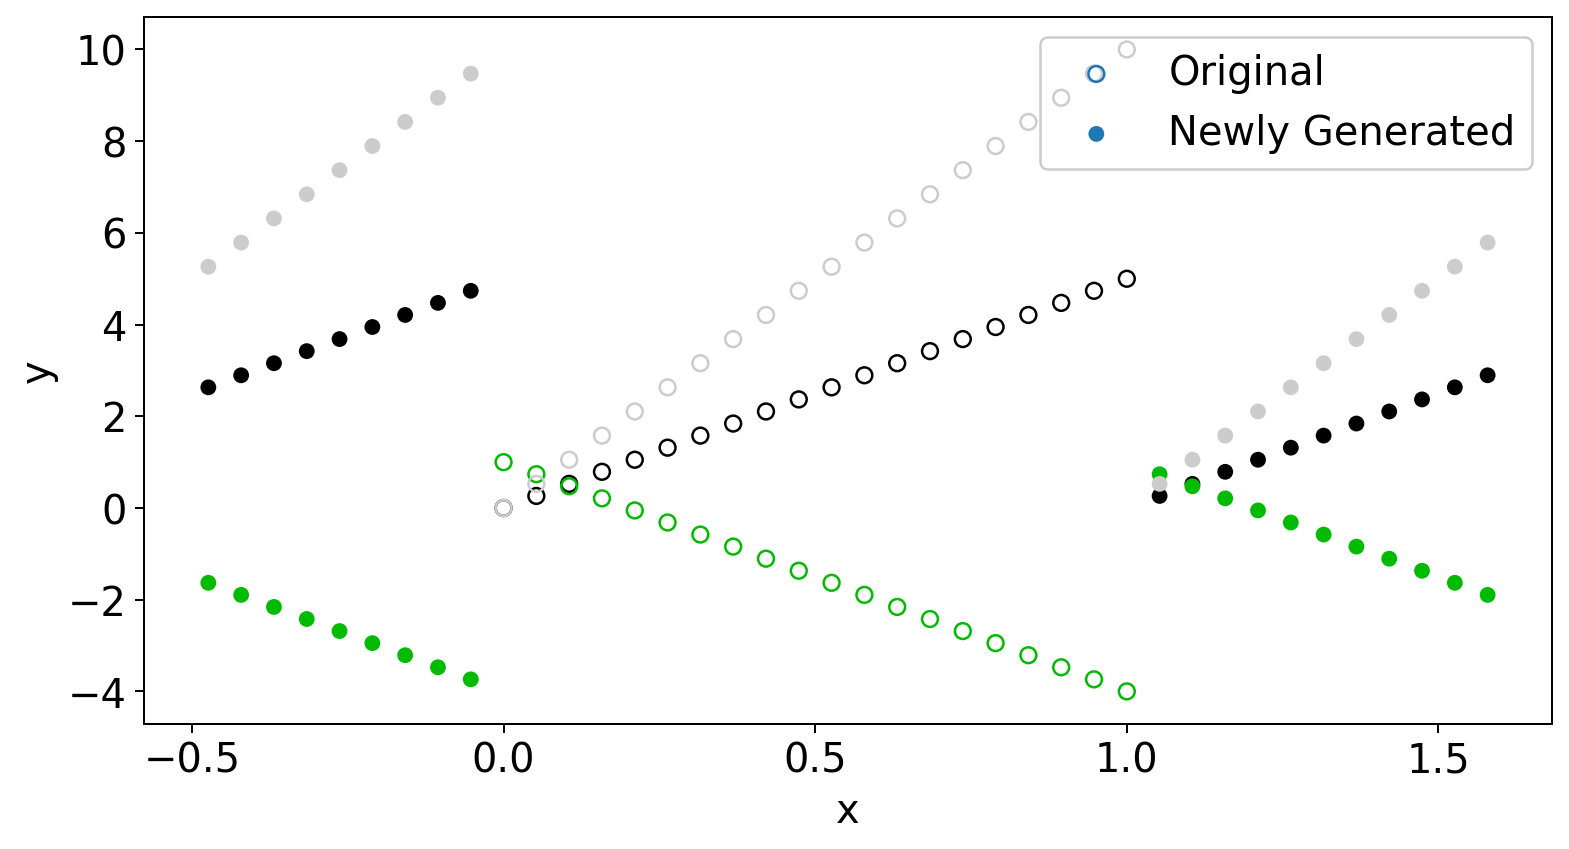

In [7]:
importlib.reload(alpdm)

PE = alpdm.PeriodicExpansion(
    0.5, 0.6, 'minmax'
)
print(PE)

X_e, y_e = PE.fit_transform(X=X, y=phases)

fig, axs = PE.plot_result(sctr_kwargs={'s':40})
plt.show()



# Generate "Stars" on a "Sky Background"

## Driven by Fluxes

C:\Users\lukas\AppData\Local\Programs\Python\Python310\lib\site-packages\astroLuSt\physics\photometry.py:300: RuntimeWarning: divide by zero encountered in log10
  m = -2.5*np.log10(f/f_ref) + m_ref
C:\Users\lukas\AppData\Local\Programs\Python\Python310\lib\site-packages\astroLuSt\synthetics\images.py:581: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if trend in ['lineary', 'linearx']:


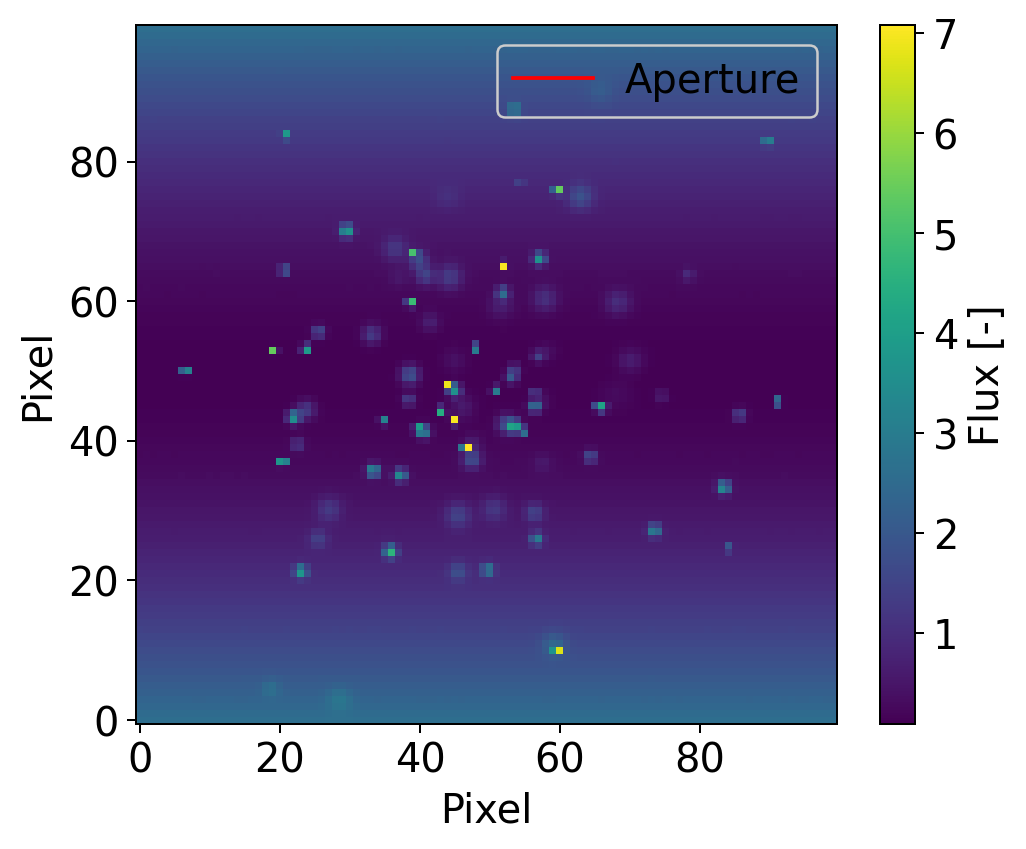

In [2]:
#using the TPF.rvs to do all at once
TPF = alsi.TPF(
    size=100,
    mode='flux',
    # mode='mag',
    f_ref=1, m_ref=0,
    store_stars=True,
    rng=None,
    verbose=0,
)

frame = TPF.rvs(
    shape=None,
    add_stars_kwargs=dict(
        nstars=100,
        posx={'dist':'normal', 'params':{'loc':50, 'scale':20}},
        posy={'dist':'normal', 'params':{'loc':50, 'scale':20}},
        f={'dist':'uniform', 'params':{'low':1,'high':10}},
        # m={'dist':'uniform', 'params':{'low':-4,'high':4}},
        aperture={'dist':'poisson', 'params':{'lam':2}},
    ),
    add_noise_kwargs=dict(
        amplitude=1E-1, bias=1E-1
    ),
    add_custom_kwargs=dict(
        trend=np.linspace(-50,np.ones((100))*50,100)**2, amplitude=1E-3
    )
)

fig, axs = TPF.plot_result()

TPF(
    size=(100, 100),
    mode='flux',
    f_ref=1, m_ref=0,
    store_stars=True,
    rng='Generator',
    verbose=0,
)


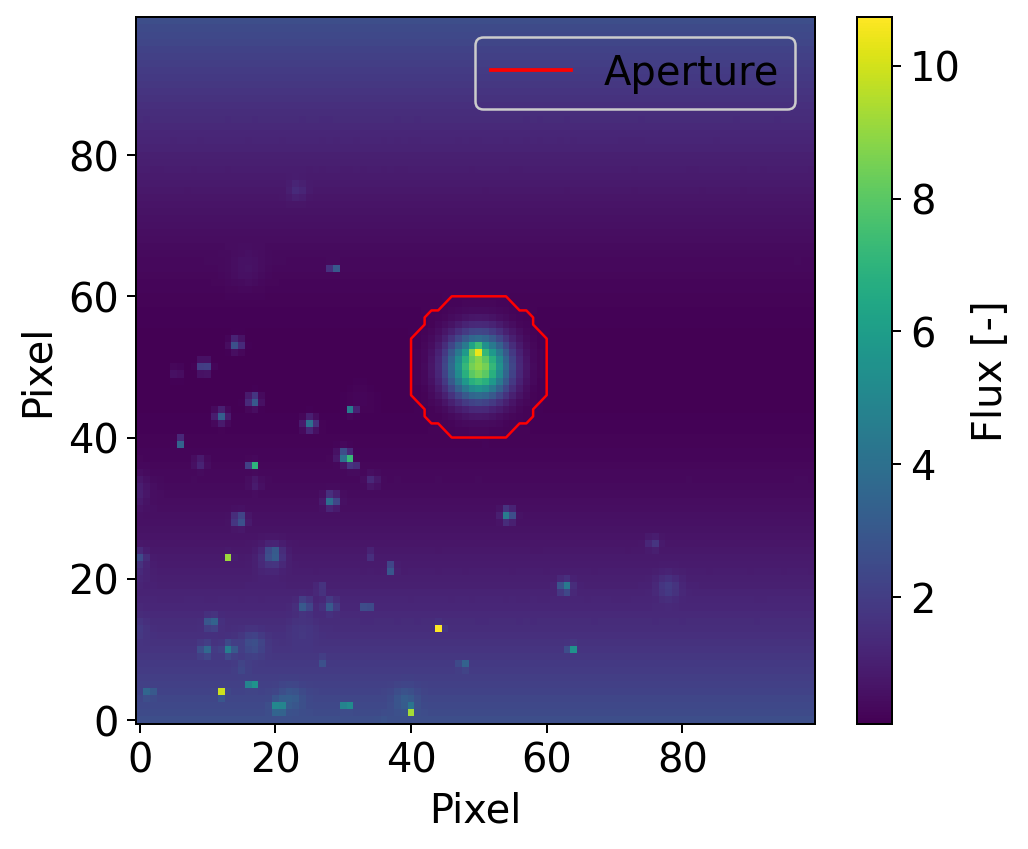

Estimated Aperture: 10


In [3]:
importlib.reload(alsi)

#using individual building blocks
TPF = alsi.TPF(
    size=100,
    mode='flux',
    # mode='mag',
    f_ref=1, m_ref=0,
    store_stars=True,
    rng=None,
    verbose=0,
)
print(TPF)

#random stars (distribution specified via dict)
TPF.add_stars(
    nstars=100,
    posx={'dist':'normal', 'params':{'loc':20, 'scale':20}},
    posy={'dist':'normal', 'params':{'loc':20, 'scale':20}},
    f={'dist':'uniform', 'params':{'low':1,'high':10}},
    # m={'dist':'uniform', 'params':{'low':-4,'high':4}},
    aperture={'dist':'poisson', 'params':{'lam':2}},
)
#specified stars
TPF.add_stars(
    nstars=1,
    posx=np.array([50]),
    posy=np.array([50]),
    f=np.array([500]),
    m=None,
    aperture=np.array([10]),
)
#custom (quadratic) trend
TPF.add_custom(np.linspace(-50,np.ones((100))*50,100)**2, amplitude=1E-3)

#noise
TPF.add_noise(amplitude=1E-1, bias=1E-1)

#plot (including last aperture)
fig, axs = TPF.plot_result(plot_apertures=[-1])
plt.show()

#estimate aperture
try:
    print(f'Estimated Aperture: {TPF.aperture_from_mask(TPF.stars[-1,:,:,2]):.0f}')
except:
    pass

## Driven by Magnitudes

TPF(
    size=(100, 100),
    mode='mag',
    f_ref=1, m_ref=0,
    store_stars=True,
    rng='Generator',
    verbose=0,
)
Estimated Aperture: 10
[ 50.          50.         630.95734448  -7.          10.        ]


C:\Users\lukas\AppData\Local\Programs\Python\Python310\lib\site-packages\astroLuSt\synthetics\images.py:584: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if trend == 'linearx':


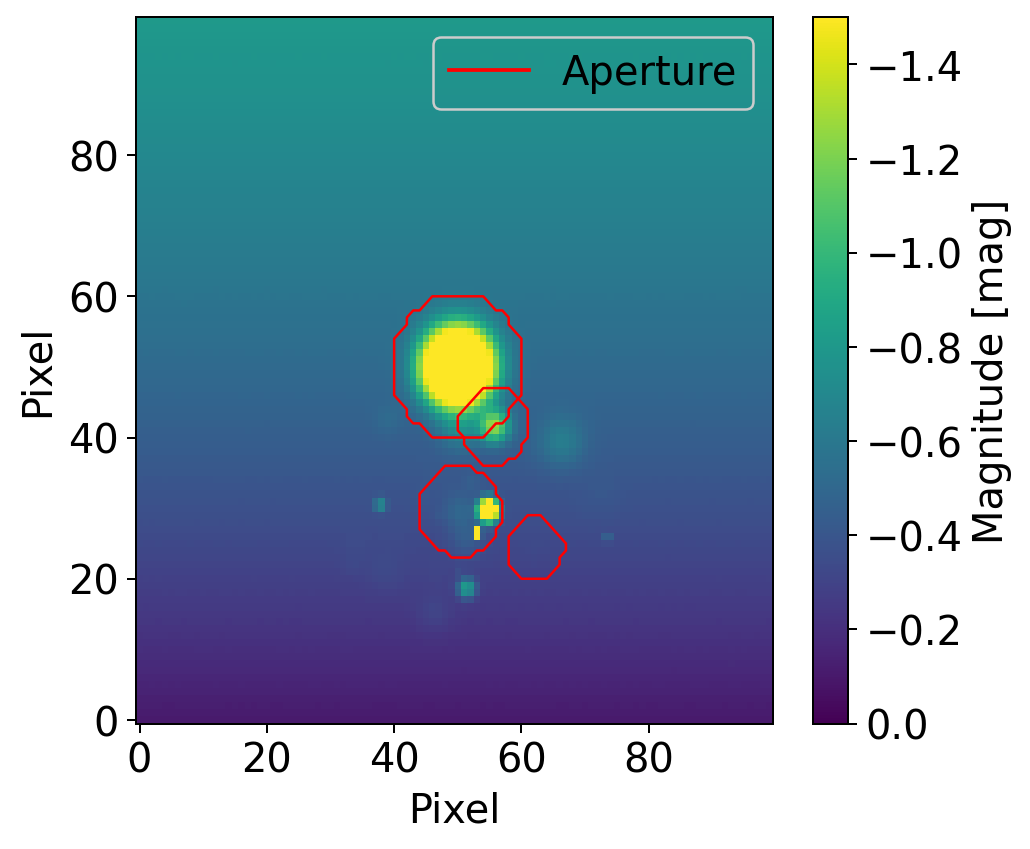

In [4]:
importlib.reload(alsi)

TPF = alsi.TPF(
    size=100,
    # mode='flux',
    mode='mag',
    f_ref=1, m_ref=0,
    store_stars=True,
    rng=None,
    verbose=0
)
print(TPF)

#random stars (distribution specified via list)
TPF.add_stars(
    nstars=30,
    posx={'dist':'chisquare', 'params':[50]},
    posy={'dist':'chisquare', 'params':[30]},
    # f={'dist':'uniform', 'params':[1,10]},
    m={'dist':'uniform', 'params':[-4,4]},
    aperture={'dist':'poisson', 'params':[5]},
)
#specified stars
TPF.add_stars(
    nstars=1,
    posx=np.array([50]),
    posy=np.array([50]),
    # f=np.array([500]),
    m=np.array([-7]),
    aperture=np.array([10]),
)

#custom (linear) trend
TPF.add_custom('lineary', amplitude=1)

#noise
TPF.add_noise(amplitude=5E-2, bias=1E-1)


#plot (including multiple apertures)
# fig, axs = TPF.plot_result(plot_apertures=range(-4,0,1))
fig, axs = TPF.plot_result(plot_apertures=range(-4,0,1), pcolormesh_kwargs=dict(vmin=-1.5, vmax=0))

try:
    print(f'Estimated Aperture: {TPF.aperture_from_mask(TPF.stars[-1,:,:,2]):.0f}')
except:
    pass
print(TPF.starparams[-1])

## Generating Movies of Stars on Silicon

### Example for Magnitudes

TPF_Series(
    size=(15, 15),
    mode='mag',
    f_ref=1, m_ref=0,
    rng='Generator',
    verbose=0,
)



MovieWriter ffmpeg unavailable; using Pillow instead.


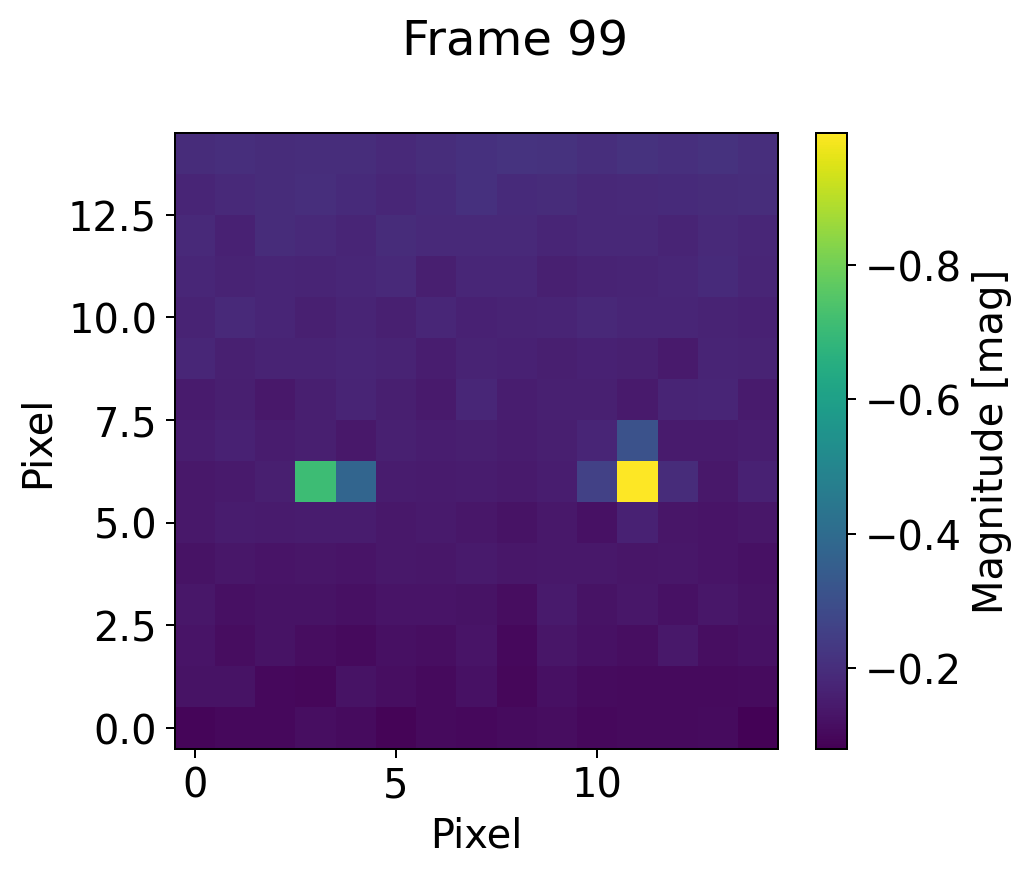

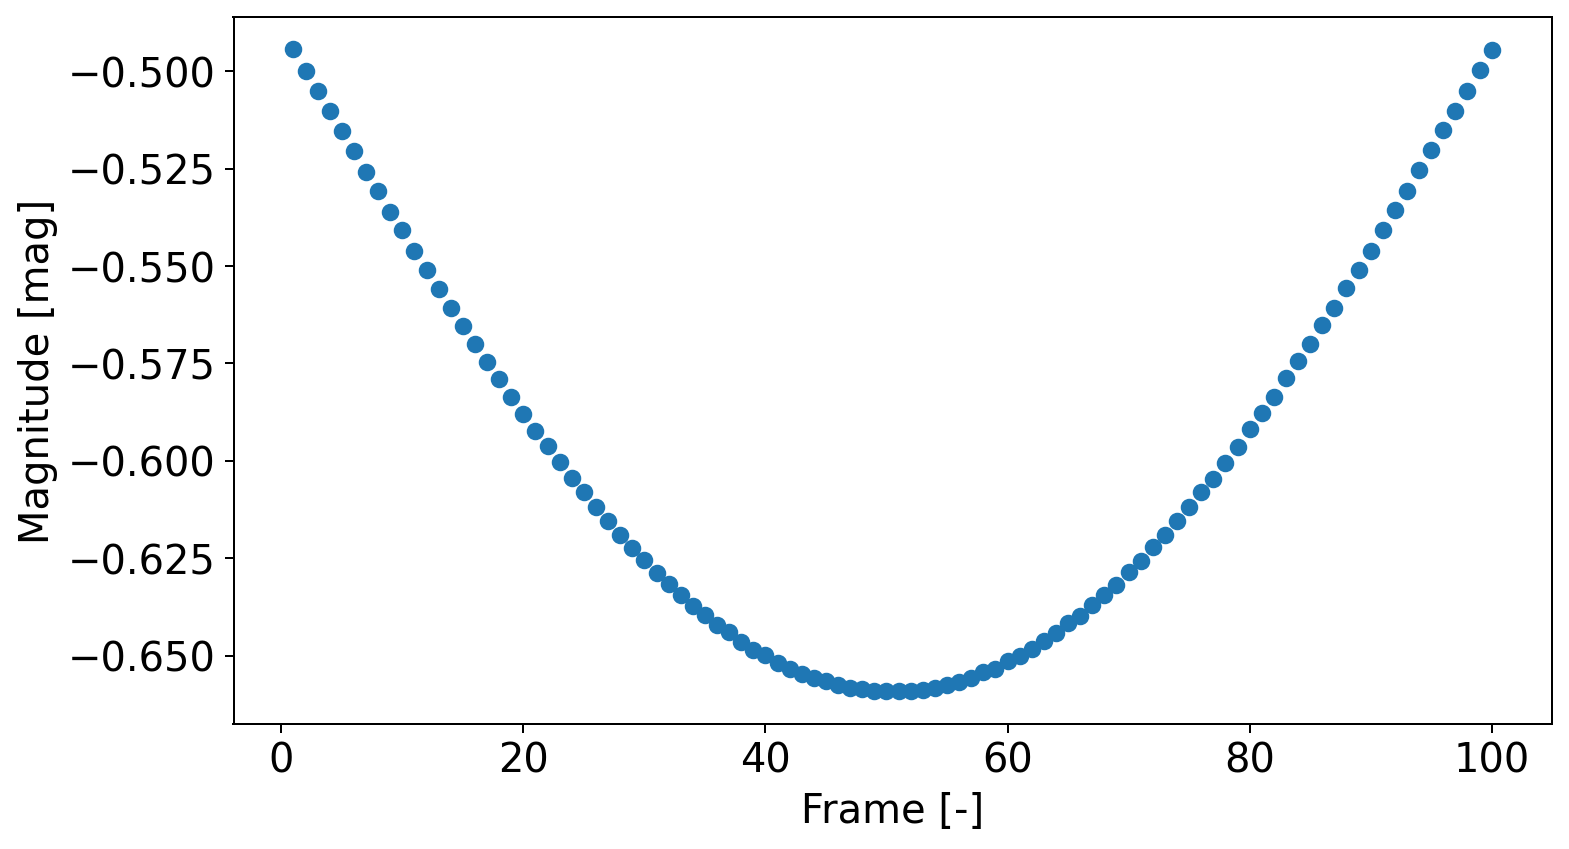

In [5]:
importlib.reload(alsi)

#define variability of magnitudes over time
def mf_var(tp, fm):
    period = 200
    amp    = 2
    rperiods = np.random.uniform(40, 50, size=fm[:-1].shape)
    ramps    = np.random.uniform(.1, 1,  size=rperiods.shape)
    
    fm[-1]  *= amp*(np.sin(2*np.pi*tp/period)+3) + 2E-3*np.random.randn(1)
    fm[:-1] *= ramps*(np.sin(2*np.pi*tp/rperiods)+2) + 1E-3*np.random.randn(*fm[:-1].shape)

    return fm

times = np.linspace(0,100,100)

TPFS = alsi.TPF_Series(
    size=15,
    # mode='flux',
    mode='mag',
    f_ref=1, m_ref=0,
    rng=None,
    verbose=0    
)
print(TPFS)


frames, starparams_s = TPFS.rvs(
    times=times,
    variability=mf_var,
    add_stars_kwargs=dict(
        nstars=2,
        m={'dist':'uniform', 'params':[-0.5, 0.5]},
        aperture={'dist':'uniform', 'params':[1, 1.5]},
    ),
    add_noise_kwargs=dict(amplitude=1, bias=1),
    add_custom_kwargs=dict(trend='lineary', amplitude=1E-1),
)

fig, axs, anim = TPFS.plot_result(
    save='./test.gif',
    # pcolormesh_kwargs=dict(vmin=-.5, vmax=-.1),
    save_kwargs=dict(fps=10)
)


#plot pure star LC of last target (variability)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(starparams_s[:,-1,-1], starparams_s[:,-1,3])
ax1.set_xlabel('Frame [-]')
ax1.set_ylabel('Magnitude [mag]')
plt.show()

### Example for Fluxes

TPF_Series(
    size=(100, 100),
    mode='flux',
    f_ref=1, m_ref=0,
    rng='Generator',
    verbose=0,
)



C:\Users\lukas\AppData\Local\Programs\Python\Python310\lib\site-packages\astroLuSt\physics\photometry.py:300: RuntimeWarning: divide by zero encountered in log10
  m = -2.5*np.log10(f/f_ref) + m_ref
MovieWriter ffmpeg unavailable; using Pillow instead.


[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50.]


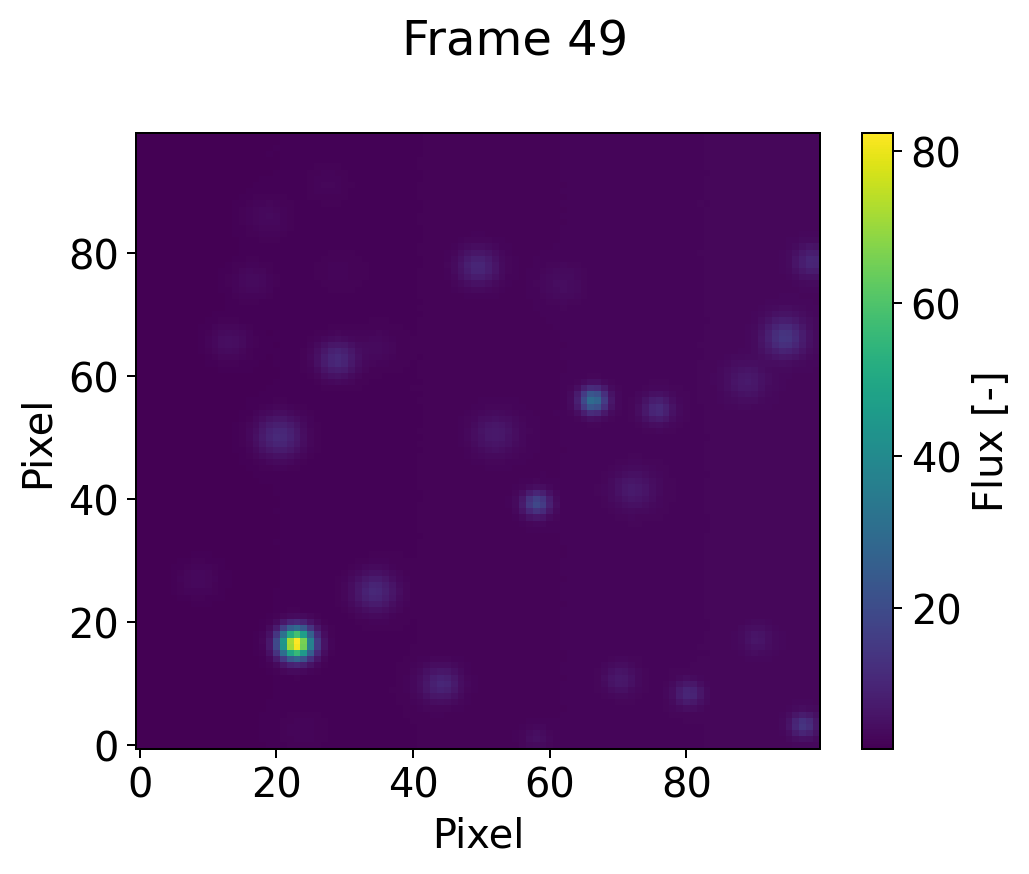

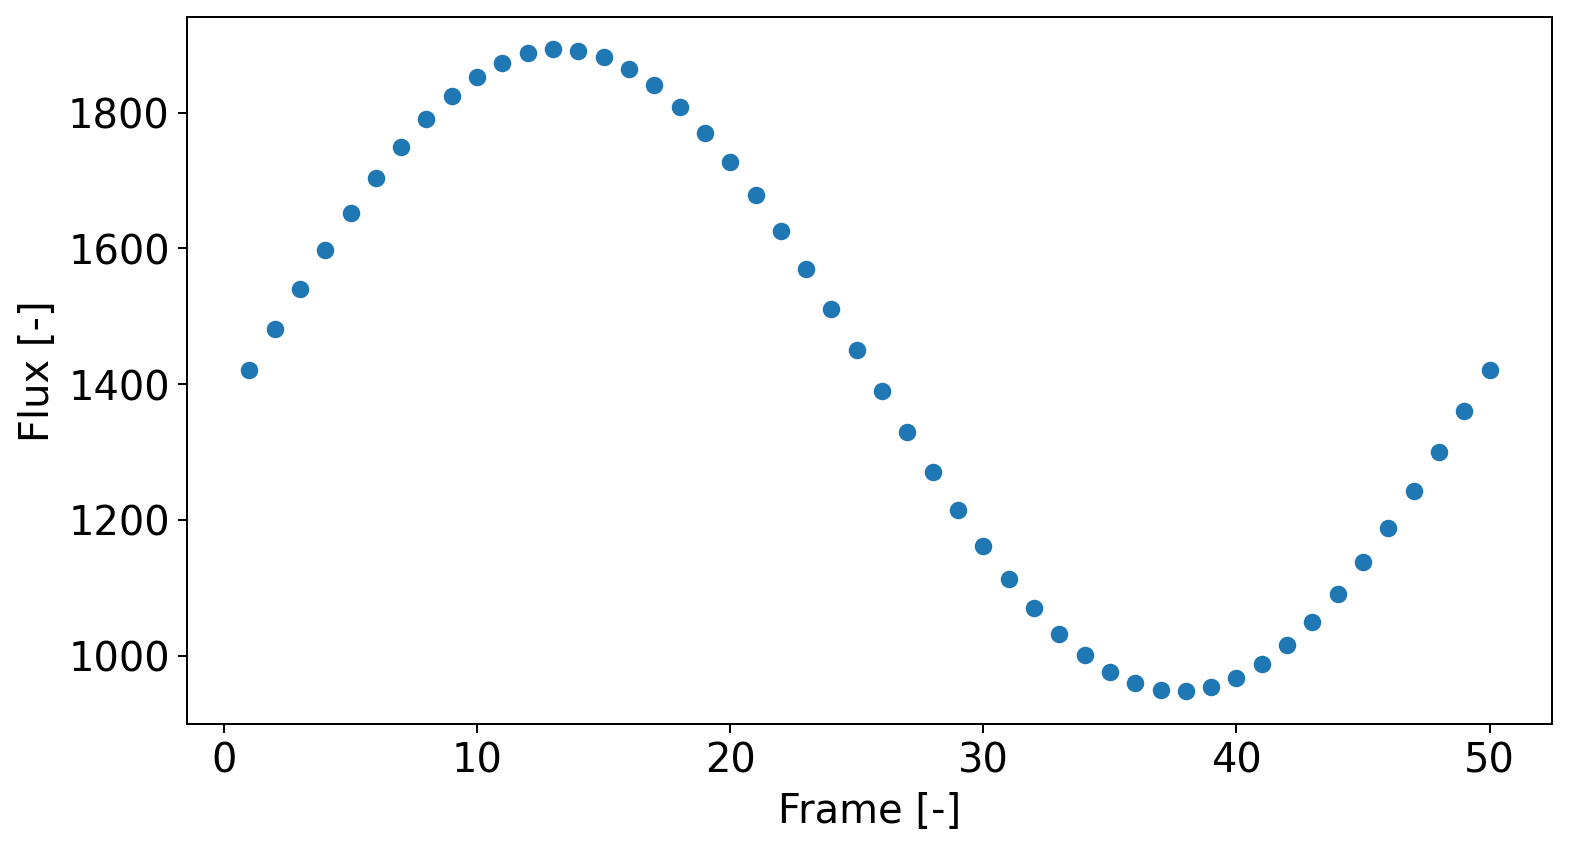

In [6]:
importlib.reload(alsi)

#define variability of magnitudes over time
def mf_var(tp, fm):
    period = 100
    amp    = 7
    rperiods = np.random.uniform(40, 50, size=fm[:-1].shape)
    ramps    = np.random.uniform(.1, 2,  size=rperiods.shape)
    
    fm[-1]  *= amp*(np.sin(2*np.pi*tp/period)+3) + 2E-3*np.random.randn(1)
    fm[:-1] *= ramps*(np.sin(2*np.pi*tp/rperiods)+2) + 1E-3*np.random.randn(*fm[:-1].shape)

    return fm

times = np.linspace(0,100,50)

TPFS = alsi.TPF_Series(
    size=100,
    mode='flux',
    # mode='mag',
    f_ref=1, m_ref=0,
    rng=None,
    verbose=0    
)
print(TPFS)


frames, starparams_s = TPFS.rvs(
    times=times,
    variability=mf_var,
    add_stars_kwargs=dict(
        nstars=30,
        posx    ={'dist':'uniform', 'params':[1, 100]},
        posy    ={'dist':'uniform', 'params':[1, 100]},
        f       ={'dist':'uniform', 'params':[20,80]},
        m       ={'dist':'uniform', 'params':[13,23]},
        aperture={'dist':'uniform', 'params':[4, 8]},
    ),
    add_noise_kwargs=dict(amplitude=5E-1, bias=1E-1),
    add_custom_kwargs=dict(trend='linearx', amplitude=1.5),
)

fig, axs, anim = TPFS.plot_result(
    save='./test.gif',
    # pcolormesh_kwargs=dict(vmin=0, vmax=3),
)


#plot pure star LC of last target (variability)
print(starparams_s[:,-1,-1])
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(starparams_s[:,-1,-1], starparams_s[:,-1,2])
ax1.set_xlabel('Frame [-]')
ax1.set_ylabel('Flux [-]')
plt.show()

# Periodic Signals

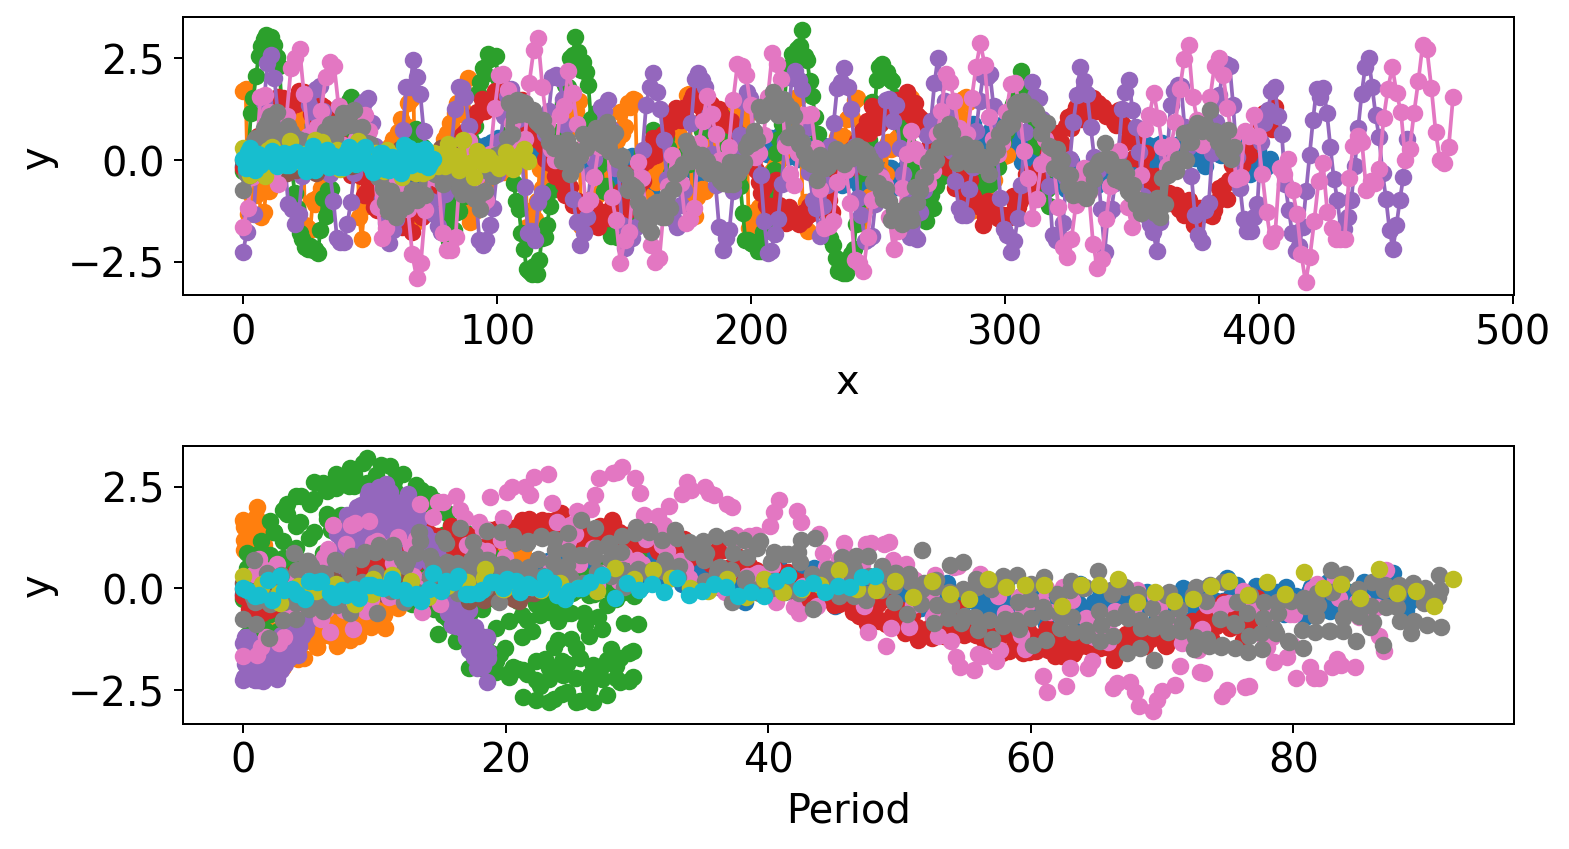

In [33]:
importlib.reload(alsr)
nsamples = 10
ncomposites = 2

GPS = alsr.GeneratePeriodicSignals(
    npoints=np.random.randint(256,512,nsamples),
    periods=np.random.uniform(0.05, 100, size=(nsamples,ncomposites)),
    amplitudes=np.sort(np.random.uniform(0.05, 2,size=(nsamples,ncomposites)), axis=1)[:,::-1],
    x_min=0, x_max=np.random.uniform(300,500,nsamples),
    x_offsets=np.random.uniform(0,7,size=(nsamples,ncomposites)),
    choices=None,
    verbose=3,
)

#work with custom generator functions
GPS.choices = np.array([
    GPS.sine_,
    GPS.cosine_,
    GPS.tangent_,
    GPS.sawtooth_,
    GPS.polynomial_,
    GPS.random_,
    lambda x, **kwargs: np.sin(x),  #custom function (takes `x` and `**kwargs`)
    np.zeros(shape=80),             #custom array (will be returned unmodified except padded with `np.nan` at the end)
], dtype=object)

# print(GPS)
#make sure every sample has unique reandom hyperparameters
func_kwargs = [dict(
        p=np.random.randn(6),   #polynomial coefficients
        amp=np.random.uniform(0.1,5), loc=np.random.uniform(-1,1), scale=np.random.uniform(0.1,1),
        init_res=50
    ) for _ in range(nsamples)]

x, y = GPS.rvs(
    noise_level_x=0.01, noise_level_y=0.2,
    func_kwargs=func_kwargs,
    choices_kwargs=dict(p=[0.5,0.05,0.0,0.2,0.05,0.05,0.05,0.1]),
    # choices_kwargs=dict(p=[0,0,0,0,0,0,1,0]),
)

fig, axs= GPS.plot_result(x, y, GPS.periods)

(10, 200) (10, 200)


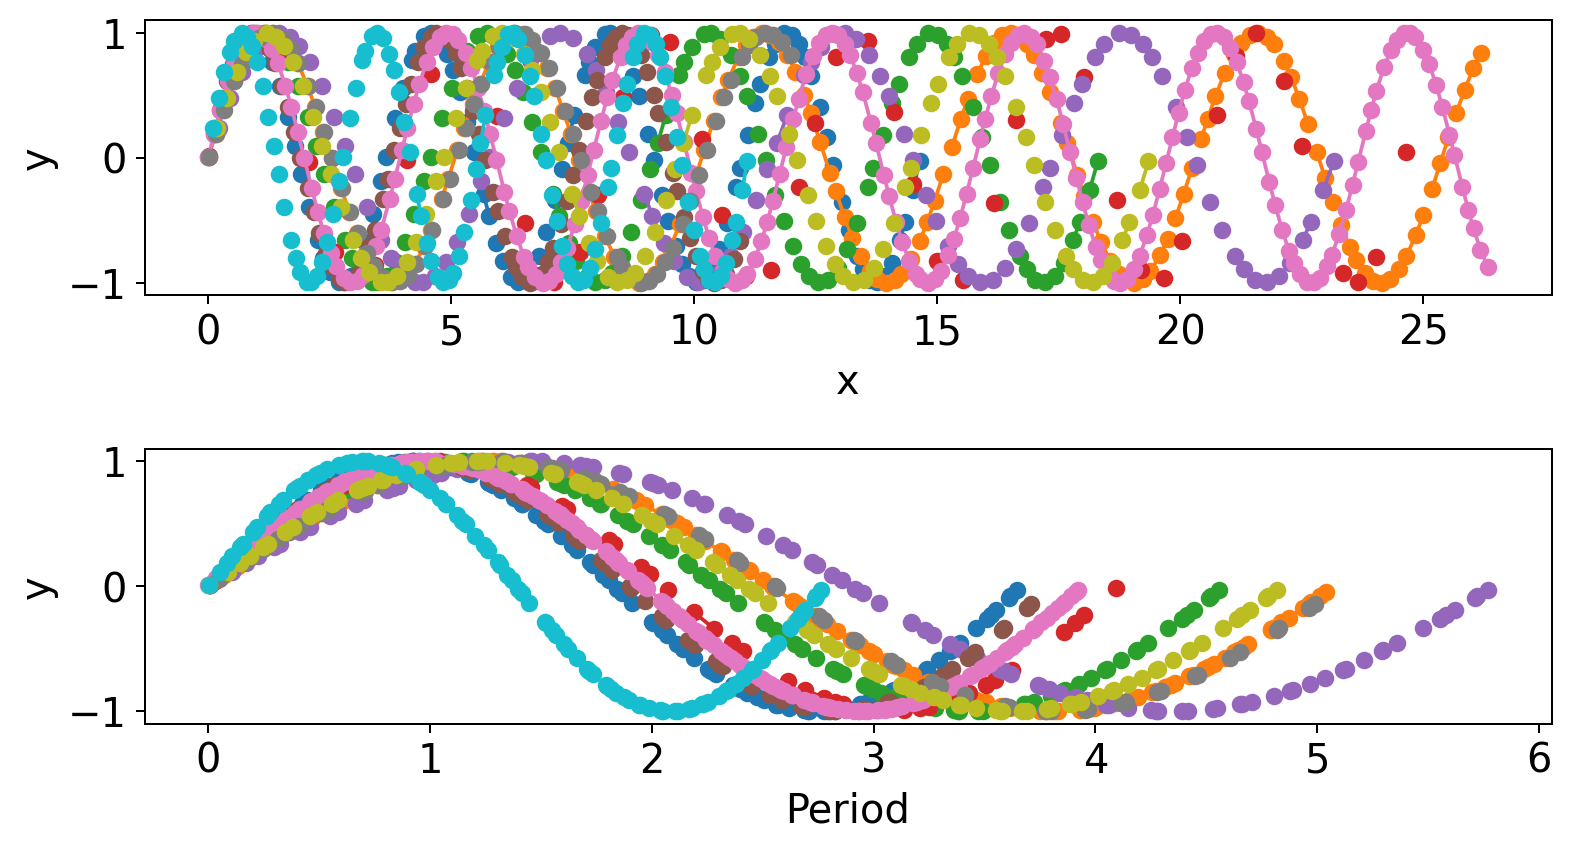

In [425]:
importlib.reload(alsr)
importlib.reload(alpdm)

p = np.array([.5,2,3])
p_new = np.random.uniform(1, 8, 1000)
x_min = 0
x_max = np.random.uniform(10,60,100)

GVR = alsr.GenerateViaReperiodizing(
    periods=p_new,
    x_min=x_min, x_max=x_max,
    verbose=0
)

# print(GVR)

# p = np.array([1,2,3])
x = [
    np.linspace(0,3,50)  +0.01*np.random.randn(50),
    np.linspace(0,8,100) +0.01*np.random.randn(100),
    np.linspace(0,20,200)+0.01*np.random.randn(200),
]
y = [np.sin(xi*2*np.pi/pi)+0.0*np.random.randn(xi.shape[0]) for xi, pi in zip(x, p)]

# fig, axs = GVR.plot_result(x, y, p)


x_gen, y_gen, p_gen = GVR.rvs(
    x, y, periods_old=p,
    size=10,
)

#padding to have equal shapes
P2S = alpdm.Pad2Size(
    size=200,
    verbose=0,
)
x_gen_pad = P2S.fit_transform(x_gen, transform_kwargs=dict(pad_kwargs={'mode':'linear_ramp'}))
y_gen_pad = P2S.fit_transform(y_gen, transform_kwargs=dict(pad_kwargs={'constant_values':np.nan}))

print(x_gen_pad.shape, y_gen_pad.shape)

fig, axs = GVR.plot_result(x_gen_pad, y_gen_pad, p_gen)